# Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

# Image Exploration

36

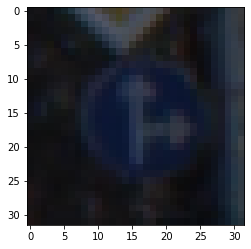

In [10]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

4

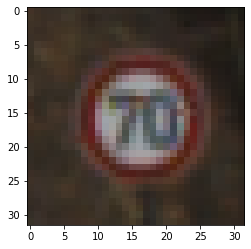

In [11]:
j = 1000
plt.imshow(X_validation[j])
y_validation[j]

17

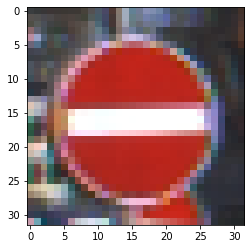

In [12]:
k = 1000
plt.imshow(X_test[k])
y_test[k]

# Data Preparation

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [17]:
X_test_gray.shape

(12630, 32, 32, 1)

In [18]:
X_train_gray_norm = (X_train_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128

In [19]:
X_train_gray_norm

array([[[[ 0.10677083],
         [ 0.1015625 ],
         [ 0.11458333],
         ...,
         [ 0.06770833],
         [ 0.046875  ],
         [-0.00260417]],

        [[ 0.1171875 ],
         [ 0.09895833],
         [ 0.11458333],
         ...,
         [ 0.0546875 ],
         [ 0.0234375 ],
         [-0.05989583]],

        [[ 0.10677083],
         [ 0.09895833],
         [ 0.11458333],
         ...,
         [ 0.0546875 ],
         [ 0.03125   ],
         [-0.02864583]],

        ...,

        [[-0.765625  ],
         [-0.76302083],
         [-0.75520833],
         ...,
         [-0.80208333],
         [-0.79947917],
         [-0.82291667]],

        [[-0.765625  ],
         [-0.75260417],
         [-0.7578125 ],
         ...,
         [-0.8125    ],
         [-0.80208333],
         [-0.81510417]],

        [[-0.77864583],
         [-0.7734375 ],
         [-0.7734375 ],
         ...,
         [-0.80729167],
         [-0.79947917],
         [-0.8046875 ]]],


       [[[-0.19791667],


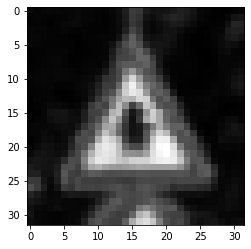

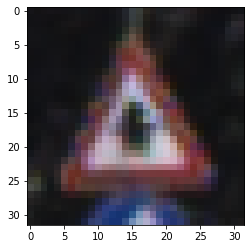

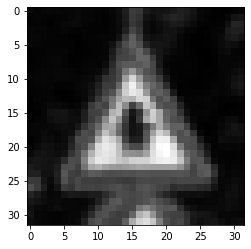

In [20]:
i = 1000
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')

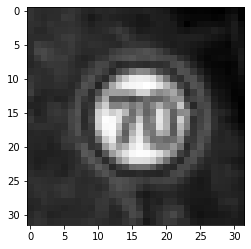

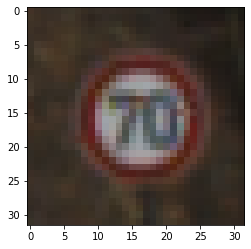

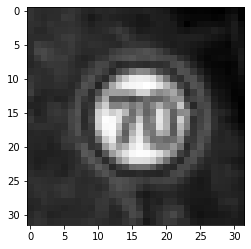

In [21]:
i = 1000
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')

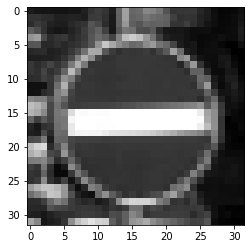

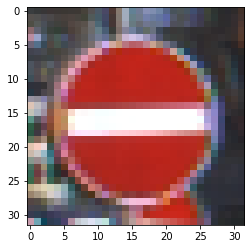

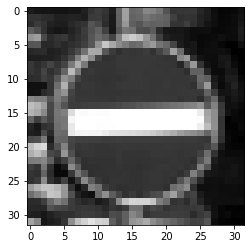

In [22]:
i = 1000
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')

# Model Training

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))

cnn_model.add(Dense(units = 84, activation = 'relu'))

cnn_model.add(Dense(units = 43, activation = 'softmax'))




In [25]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [26]:
history = cnn_model.fit(X_train_gray_norm, 
             y_train, 
             batch_size = 500,
             epochs = 50,
             verbose =1,
             validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 17s 224ms/step - loss: 3.5479 - accuracy: 0.0715 - val_loss: 3.1701 - val_accuracy: 0.1837
Epoch 2/50
70/70 [==============================] - 11s 153ms/step - loss: 2.5130 - accuracy: 0.3257 - val_loss: 1.7497 - val_accuracy: 0.5150
Epoch 3/50
70/70 [==============================] - 11s 158ms/step - loss: 1.3098 - accuracy: 0.6164 - val_loss: 1.2978 - val_accuracy: 0.6220
Epoch 4/50
70/70 [==============================] - 11s 156ms/step - loss: 0.9346 - accuracy: 0.7216 - val_loss: 1.1340 - val_accuracy: 0.6762
Epoch 5/50
70/70 [==============================] - 12s 176ms/step - loss: 0.7277 - accuracy: 0.7901 - val_loss: 0.9957 - val_accuracy: 0.7086
Epoch 6/50
70/70 [==============================] - 11s 159ms/step - loss: 0.6263 - accuracy: 0.8174 - val_loss: 0.9065 - val_accuracy: 0.7413
Epoch 7/50
70/70 [==============================] - 11s 157ms/step - loss: 0.5268 - accuracy: 0.8515 - val_loss: 0.8964 - val_accuracy: 0.7599

# Model Evaluation

In [27]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 6ms/step - loss: 1.4416 - accuracy: 0.8442
Test Accuracy: 0.8441805243492126


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

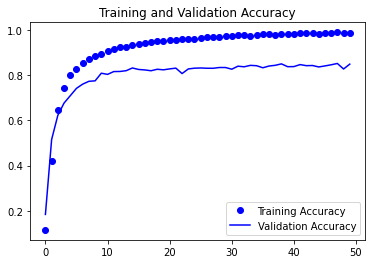

In [30]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label ='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

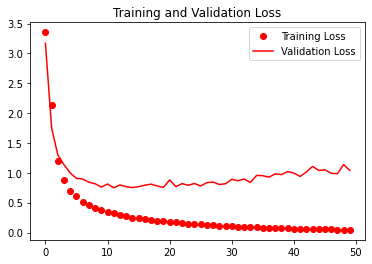

In [31]:
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'ro', label ='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [32]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
y_true = y_test

C:\Users\janhv\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<AxesSubplot:>

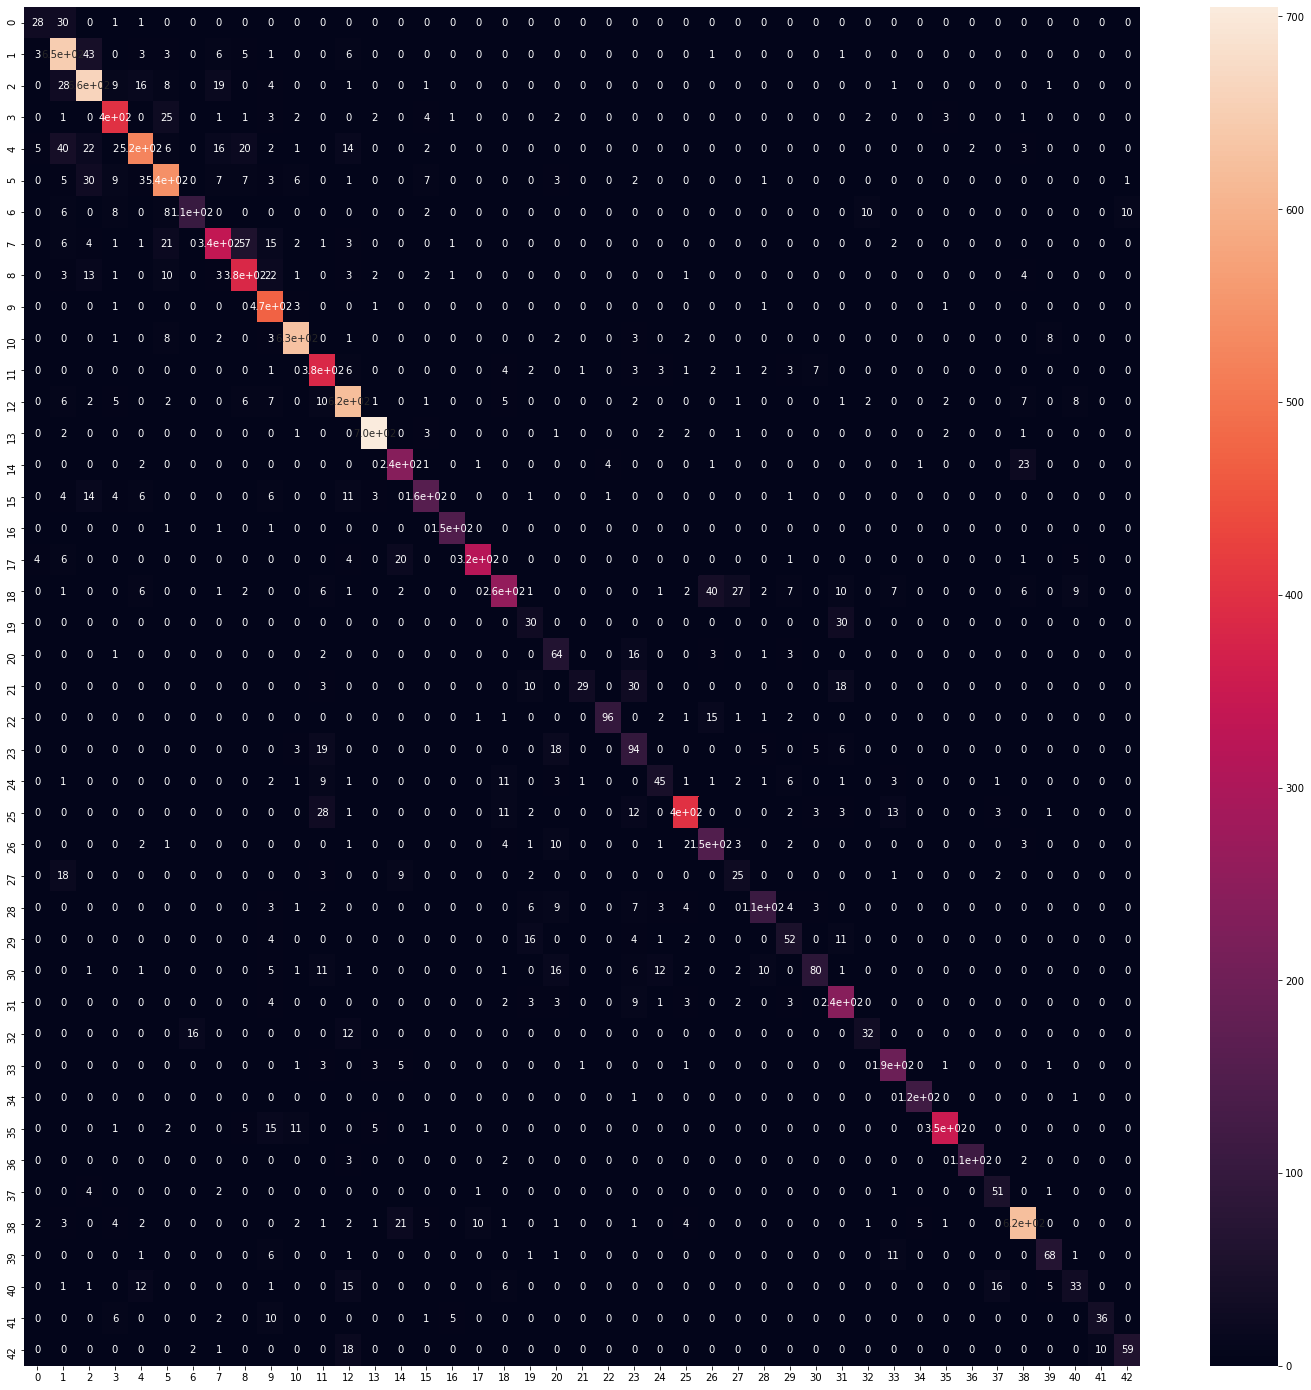

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot = True)

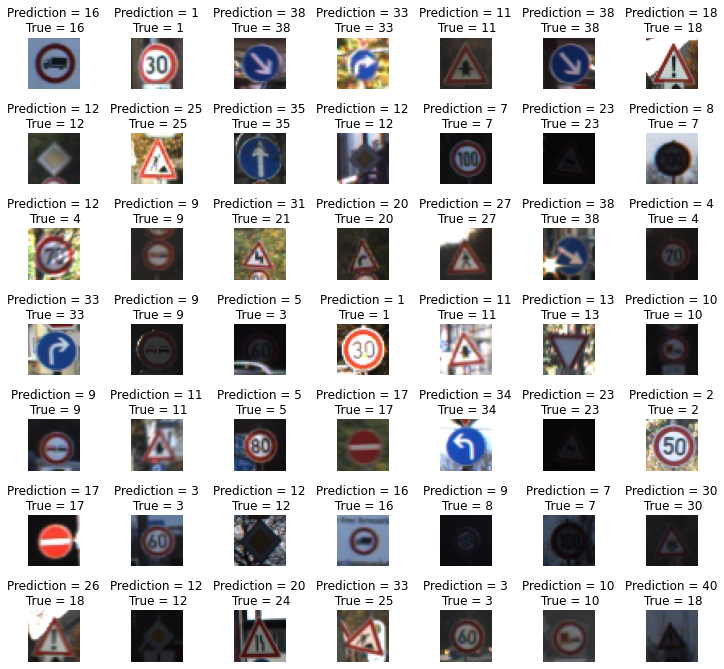

In [34]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize =(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace =1)